<a href="https://colab.research.google.com/github/zwzzhong/Titanic_Survival_Prediction/blob/master/Titanic_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Connect to data via Google Drive**

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### **Import packages**

In [0]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### **Overview the Data**

In [0]:
traindata = pd.read_csv('/content/drive/My Drive/train.csv')
traindata.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
testdata = pd.read_csv('/content/drive/My Drive/test.csv')
testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### **Data Quality**

In [0]:
# Number of null value in our dataset for each variable
print(pd.isnull(traindata).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### **Data visualization**

In [0]:
# Distribution of survival vs not survival
surv = traindata[traindata['Survived']==1]
nosurv = traindata[traindata['Survived']==0]

print(f"Survived:",len(surv), round(len(surv)/len(traindata)*100.0, 2), 
      "perecnt;\n""Not Survived:",len(nosurv), round(len(nosurv)/len(traindata)*100.0, 2), "perecnt.\n"
     "Total:", len(traindata))

Survived: 342 38.38 perecnt;
Not Survived: 549 61.62 perecnt.
Total: 891


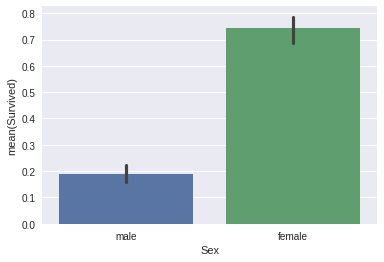

In [0]:
# Survival by gender
plt.subplot()
sns.barplot('Sex', 'Survived', data=traindata)

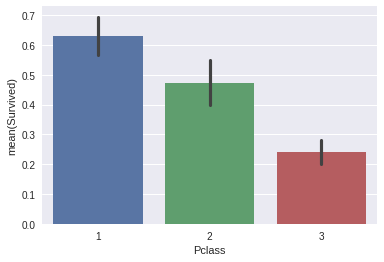

In [0]:
# Survival by social class
plt.subplot()
sns.barplot('Pclass', 'Survived', data=traindata)

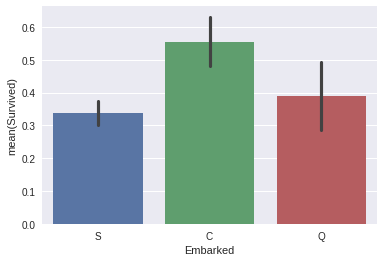

In [0]:
# Survival by Embarked
plt.subplot()
sns.barplot('Embarked', 'Survived', data=traindata)

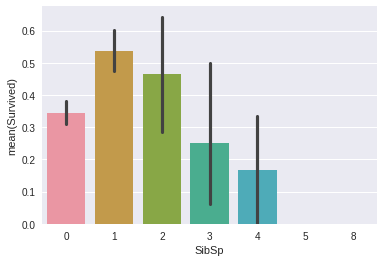

In [0]:
# Survival by number of sibling/spouse
plt.subplot()
sns.barplot('SibSp', 'Survived', data=traindata)

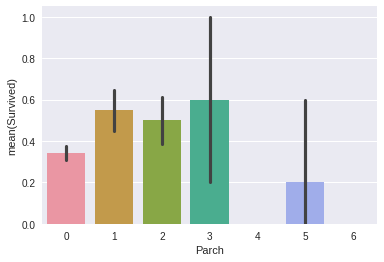

In [0]:
# Survival by parch
plt.subplot()
sns.barplot('Parch', 'Survived', data=traindata)

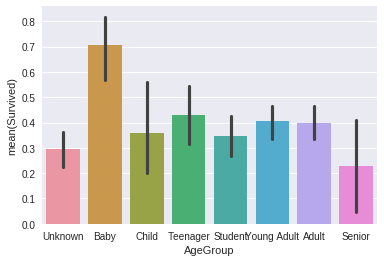

In [0]:
# Survival by Age
traindata["Age"] = traindata["Age"].fillna(-0.5)
testdata["Age"] = testdata["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
traindata['AgeGroup'] = pd.cut(traindata["Age"], bins, labels = labels)
testdata['AgeGroup'] = pd.cut(testdata["Age"], bins, labels = labels)

sns.barplot(x="AgeGroup", y="Survived", data=traindata)
plt.show()

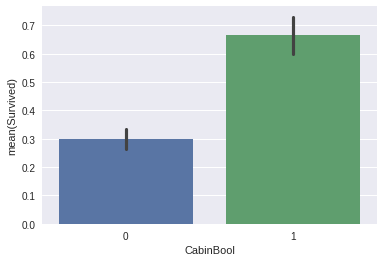

In [0]:
# Survival by Cabin feature
traindata["CabinBool"] = (traindata["Cabin"].notnull().astype('int'))
testdata["CabinBool"] = (testdata["Cabin"].notnull().astype('int'))
plt.subplot()
sns.barplot(x="CabinBool", y="Survived", data=traindata)
plt.show()

### **Data cleaning**

In [0]:
print(f' Number of people embarking in Southampton:', len(traindata[traindata["Embarked"] == "S"]), ';\n',
     f'Number of people embarking in Cherbourg:', len(traindata[traindata["Embarked"] == "C"]), ';\n',
     f'Number of people embarking in Queenstown:', len(traindata[traindata["Embarked"] == "Q"]), ';')

# Since Southampton has most embarking number, we fill the null value with "S"
traindata = traindata.fillna({"Embarked": "S"})

print(f' Number of people embarking in Southampton:', len(traindata[traindata["Embarked"] == "S"]), ';\n',
     f'Number of people embarking in Cherbourg:', len(traindata[traindata["Embarked"] == "C"]), ';\n',
     f'Number of people embarking in Queenstown:', len(traindata[traindata["Embarked"] == "Q"]), ';')

 Number of people embarking in Southampton: 644 ;
 Number of people embarking in Cherbourg: 168 ;
 Number of people embarking in Queenstown: 77 ;
 Number of people embarking in Southampton: 646 ;
 Number of people embarking in Cherbourg: 168 ;
 Number of people embarking in Queenstown: 77 ;


In [0]:
# create a combined group of both datasets
combine = [traindata, testdata]

# extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(traindata['Title'], traindata['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [0]:
# replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

traindata[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [0]:
# map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,1


In [0]:
# fill missing age with mode age group for each title
mr_age = traindata[traindata["Title"] == 1]["AgeGroup"].mode() 
miss_age = traindata[traindata["Title"] == 2]["AgeGroup"].mode() 
mrs_age = traindata[traindata["Title"] == 3]["AgeGroup"].mode() 
master_age = traindata[traindata["Title"] == 4]["AgeGroup"].mode()
royal_age = traindata[traindata["Title"] == 5]["AgeGroup"].mode() 
rare_age = traindata[traindata["Title"] == 6]["AgeGroup"].mode() 

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}
traindata = traindata.fillna({"Age": traindata["Title"].map(age_title_mapping)})
testdata = testdata.fillna({"Age": testdata["Title"].map(age_title_mapping)})

In [0]:
for x in range(len(traindata["AgeGroup"])):
    if traindata["AgeGroup"][x] == "Unknown":
        traindata["AgeGroup"][x] = age_title_mapping[traindata["Title"][x]]
        
for x in range(len(testdata["AgeGroup"])):
    if testdata["AgeGroup"][x] == "Unknown":
        testdata["AgeGroup"][x] = age_title_mapping[testdata["Title"][x]]

In [0]:
# map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
traindata['AgeGroup'] = traindata['AgeGroup'].map(age_mapping)
testdata['AgeGroup'] = testdata['AgeGroup'].map(age_mapping)

traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,6,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5,0,1


In [0]:
# map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
traindata['Sex'] = traindata['Sex'].map(sex_mapping)
testdata['Sex'] = testdata['Sex'].map(sex_mapping)

traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,4,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,6,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,5,1,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,5,0,1


In [0]:
# map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
traindata['Embarked'] = traindata['Embarked'].map(embarked_mapping)
testdata['Embarked'] = testdata['Embarked'].map(embarked_mapping)

traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,4,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,6,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,5,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,5,1,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,5,0,1


In [0]:
# fill in missing Fare value in test based on mean fare for that Pclass 
for x in range(len(testdata["Fare"])):
    if pd.isnull(testdata["Fare"][x]):
        pclass = testdata["Pclass"][x] 
        testdata["Fare"][x] = round(traindata[traindata["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
traindata['FareBand'] = pd.qcut(traindata['Fare'], 4, labels = [1, 2, 3, 4])
testdata['FareBand'] = pd.qcut(testdata['Fare'], 4, labels = [1, 2, 3, 4])

traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,4,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,6,1,3,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,5,0,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,5,1,3,4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,5,0,1,2


In [0]:
traindata = traindata.drop(['Cabin', 'Ticket', 'Name', 'Age', 'Fare'], axis = 1)
testdata = testdata.drop(['Cabin','Ticket', 'Name', 'Age', 'Fare'], axis = 1)

traindata.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4,0,1,1
1,2,1,1,1,1,0,2,6,1,3,4
2,3,1,3,1,0,0,1,5,0,2,2
3,4,1,1,1,1,0,1,5,1,3,4
4,5,0,3,0,0,0,1,5,0,1,2


### **Model selection**

In [0]:
from sklearn.model_selection import train_test_split

predictors = traindata.drop(['Survived', 'PassengerId'], axis=1)
target = traindata["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, random_state = 0)

In [0]:
# Testing different model

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

78.48


In [0]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

81.61


In [0]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

78.03


In [0]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

82.51


In [0]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

81.61


In [0]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

82.06


In [0]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.03


In [0]:
# models comparision
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_decisiontree
              , acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,82.51
6,Gradient Boosting Classifier,82.06
0,Support Vector Machines,81.61
1,KNN,81.61
2,Logistic Regression,78.48
4,Naive Bayes,78.03
5,Decision Tree,78.03


### **Since the Random Forest method has the highest score, I prefer to use it for the testing data**

### **Submission**

In [0]:
ids = testdata['PassengerId']
predictions = randomforest.predict(testdata.drop('PassengerId', axis=1))

output = pd.DataFrame({'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)